# K Nearest Neighbors Project 

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

## Get the Data

In [21]:
df = pd.read_csv('KNN_Project_Data')

**Check the head of the dataframe.**

In [22]:
df.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


# Exploratory Data Analysis (EDA)

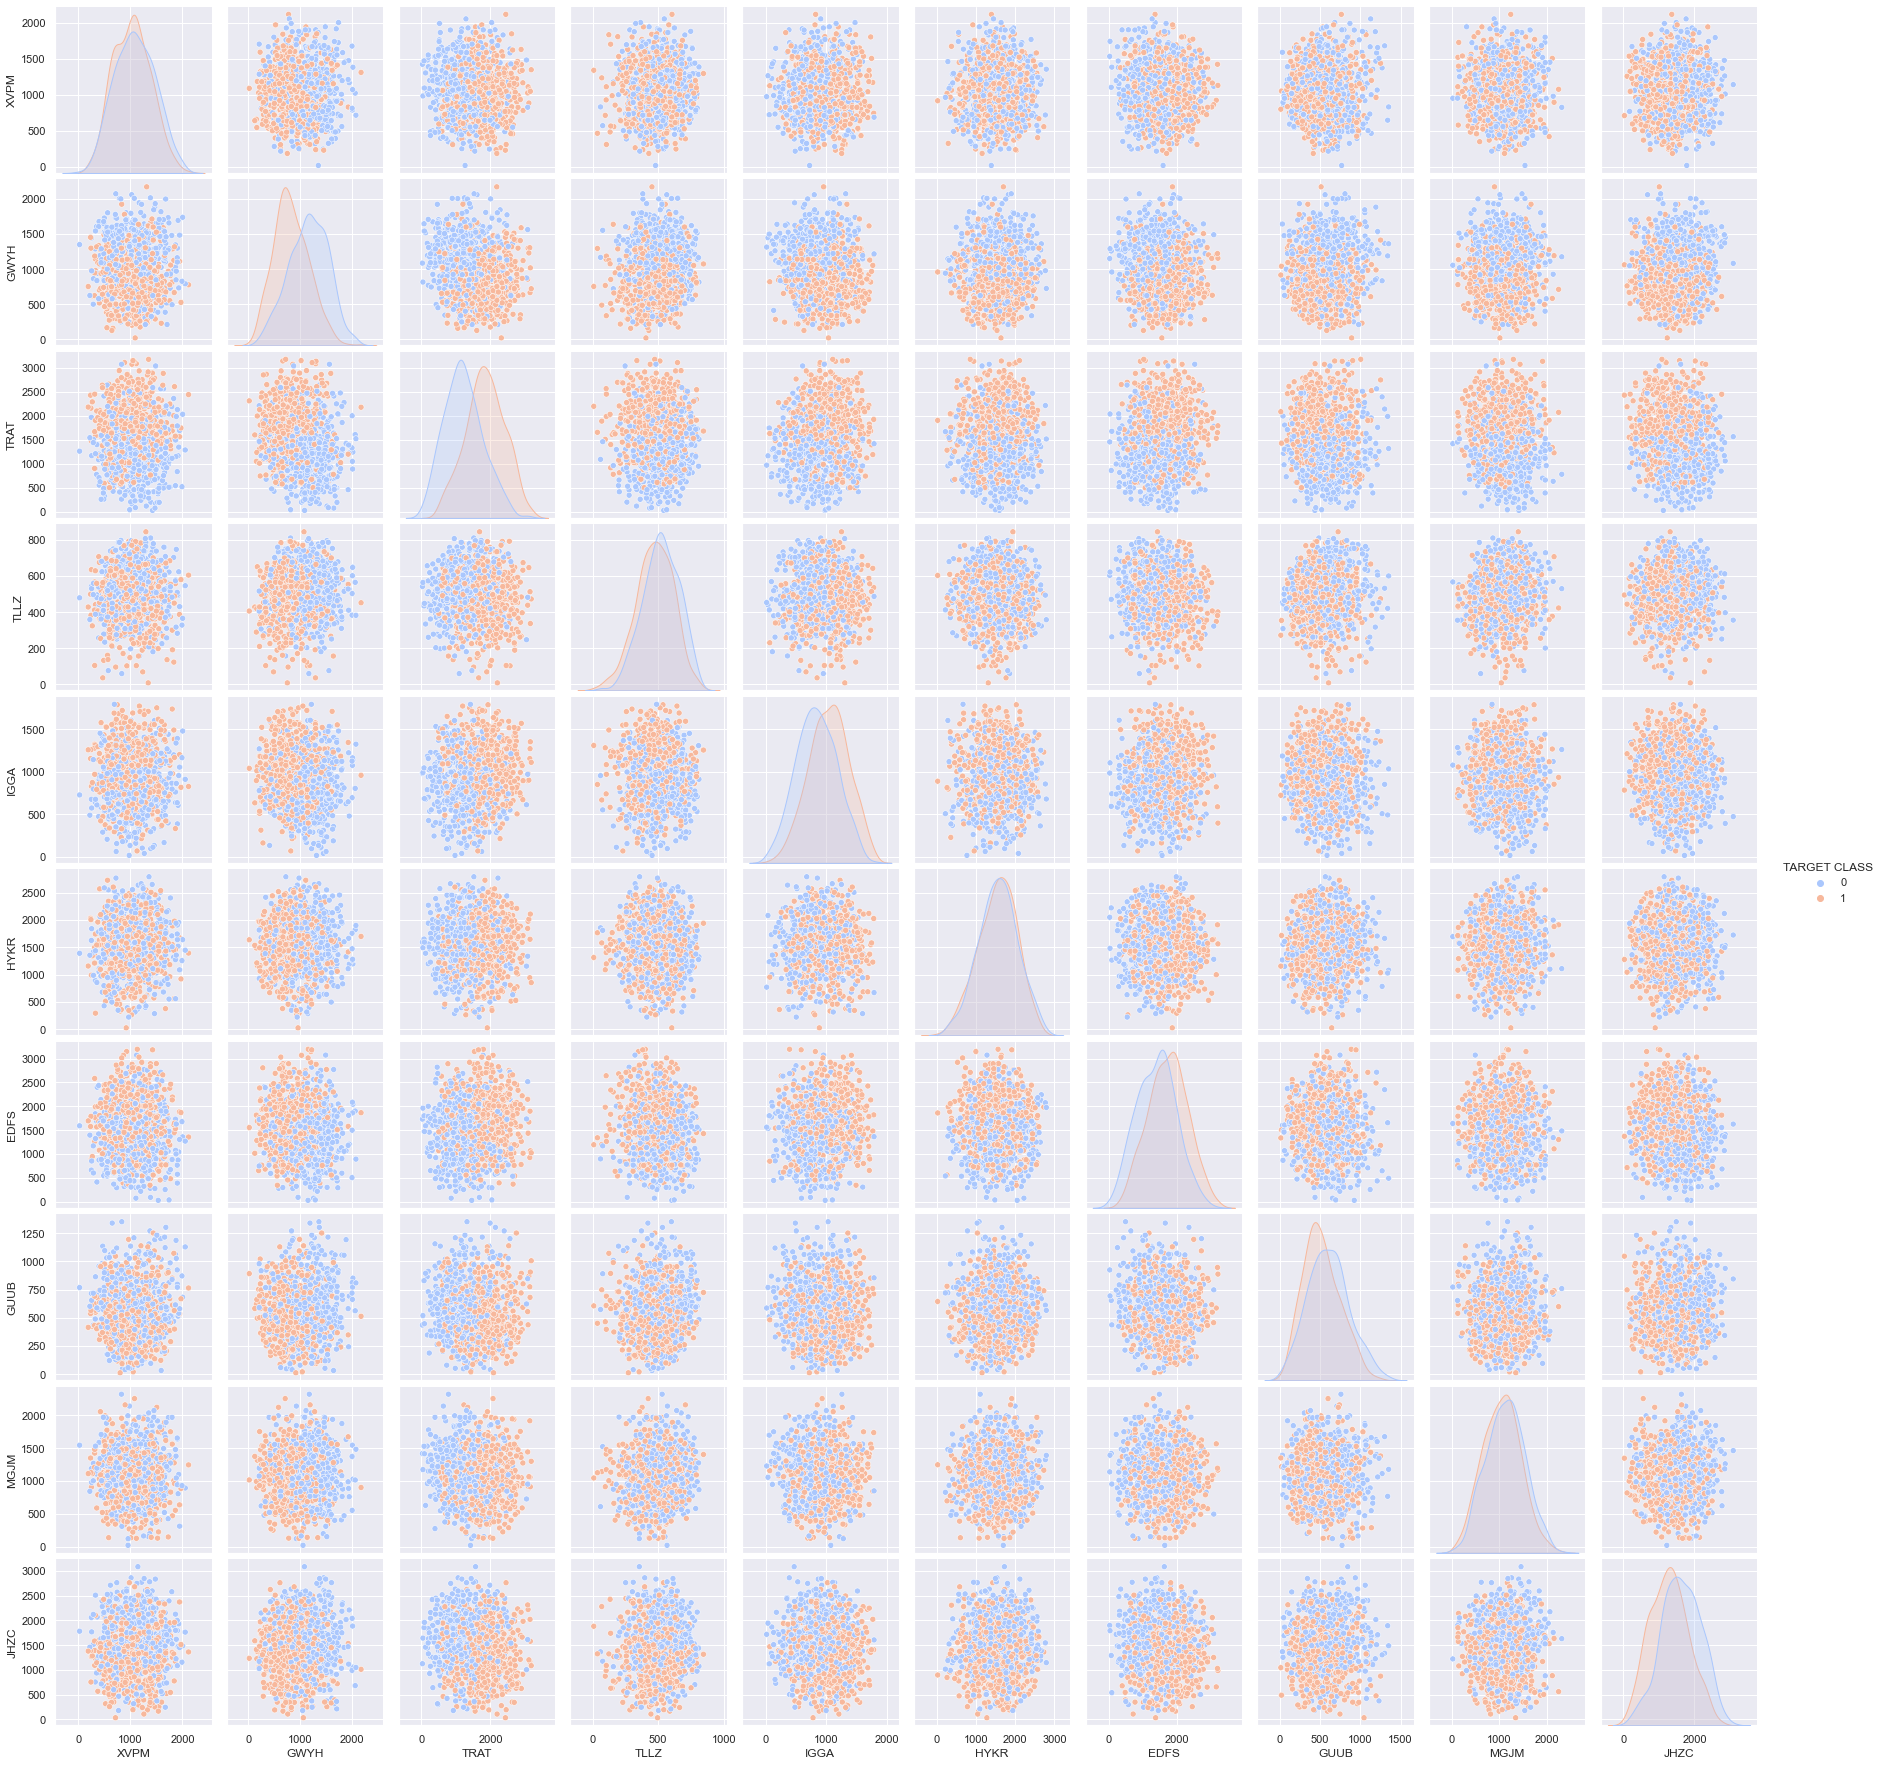

In [6]:
sns.pairplot(df, hue='TARGET CLASS', palette='coolwarm')

# Standardize the Variables

In [19]:
from sklearn.preprocessing import StandardScaler

In [15]:
scaler = StandardScaler()

In [25]:
scaler.fit(df.drop('TARGET CLASS', axis=1)) # Compute the mean and std to be used for later scaling.

StandardScaler()


In [11]:
scaled_features = scaler.transform(df.drop('TARGET CLASS', axis=1)) # Perform standardization by centering and scaling

In [18]:
df_feat = pd.DataFrame(scaled_features, columns=df.columns[:-1])
df_feat.head(3)

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,1.568522,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627
1,-0.112376,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321,-1.041546
2,0.660647,-0.436981,0.775793,0.213394,-0.053171,2.030872,-1.240707,1.149298,2.184784,0.342811


# Train Test Split

In [27]:
from sklearn.model_selection import train_test_split

In [31]:
X = df_feat
y = df['TARGET CLASS']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Using KNN

In [34]:
from sklearn.neighbors import KNeighborsClassifier

In [35]:
knn = KNeighborsClassifier(n_neighbors=1)

In [36]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

# Predictions and Evaluations

In [37]:
pred = knn.predict(X_test)

In [38]:
from sklearn.metrics import classification_report, confusion_matrix

In [39]:
print(confusion_matrix(y_test, pred))

[[109  43]
 [ 41 107]]


In [40]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.73      0.72      0.72       152
           1       0.71      0.72      0.72       148

    accuracy                           0.72       300
   macro avg       0.72      0.72      0.72       300
weighted avg       0.72      0.72      0.72       300



# Choosing a K Value

In [52]:
# Trying results on different k values
error_rate = []

for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

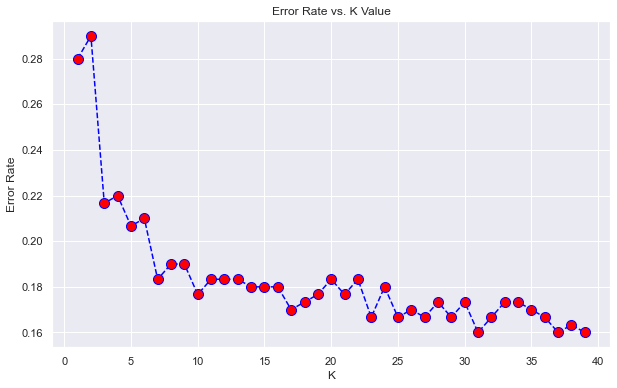

In [53]:
plt.figure(figsize=(10, 6))
        # X-axis, Y-asix
plt.plot(range(1, 40), error_rate, color="blue", linestyle='--', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

## Retrain with new K Value

In [54]:
knn = KNeighborsClassifier(n_neighbors=30)
knn.fit(X_train, y_train)   # give input and output to learn pattren
pred = knn.predict(X_test)  # give input to model to predict output value itself

print(confusion_matrix(y_test, pred))  # now compare predictied values and actual values
print('\n')
print(classification_report(y_test, pred))

[[124  28]
 [ 24 124]]


              precision    recall  f1-score   support

           0       0.84      0.82      0.83       152
           1       0.82      0.84      0.83       148

    accuracy                           0.83       300
   macro avg       0.83      0.83      0.83       300
weighted avg       0.83      0.83      0.83       300



In [57]:
knn = KNeighborsClassifier(n_neighbors=31)
knn.fit(X_train, y_train)   # give input and output to learn pattren
pred = knn.predict(X_test)  # give input to model to predict output value itself

print(confusion_matrix(y_test, pred))  # now compare predictied values and actual values
print('\n')
print(classification_report(y_test, pred))

[[123  29]
 [ 19 129]]


              precision    recall  f1-score   support

           0       0.87      0.81      0.84       152
           1       0.82      0.87      0.84       148

    accuracy                           0.84       300
   macro avg       0.84      0.84      0.84       300
weighted avg       0.84      0.84      0.84       300

